Here we will use Mahotas for image processing, 
Keras library for creating our CNN model and its training.

We will also use Matplotlib and Seaborn for visualizing our dataset to gain a better understanding of the images we are going to be handling.

We will also use libraries os and glob to work with files and folders. 

NumPy - for arrays of images. 

Scikit-Learn - for classical classification models. 

Pandas - for present comparison of classifiers.


In [1]:
import mahotas as mh
import seaborn as sns
from matplotlib import pyplot as plt 
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 

#Classifiers
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix

## Data loading


In [2]:
def get_data(folder, file):
    plt.rcParams["axes.grid"] = False
    data = []
    print(folder + '/' + file)
    ds = pd.read_csv(folder + '/' + file + '.csv') # Form a DataSet from a csv
    print(ds)
    i = 0
    r = 0
    pr = 0
    for im, c in ds.values:
        if i==0 and r < 50:
            fig = plt.figure(figsize = (20,20)) # Display an image
        image = mh.imread(folder + '/' + file + '/' + im) #Download an image

        
        if image.shape[2] == 3:
            data.append([image, c]) # Append finaly DataSet
        if r < 50:
            plt.subplot(1, 5, i+1) # Create a table of images
            plt.imshow(image)
        i += 1
        if i==5:         
            i = 0
        r += 1
    plt.show()
   
    print(data[0])
    
    return np.array(data)   

brain_archive/all_set
        Te-no_0051.jpg  0
0     Tr-no_1010 2.jpg  0
1             y369.jpg  1
2     Tr-no_1055 2.jpg  0
3     Tr-no_1484 2.jpg  0
4       Tr-no_0798.jpg  0
...                ... ..
5159  Tr-no_0595 2.jpg  0
5160          y370.jpg  1
5161  Tr-no_0907 2.jpg  0
5162  Tr-no_0144 2.jpg  0
5163    Te-no_0048.jpg  0

[5164 rows x 2 columns]


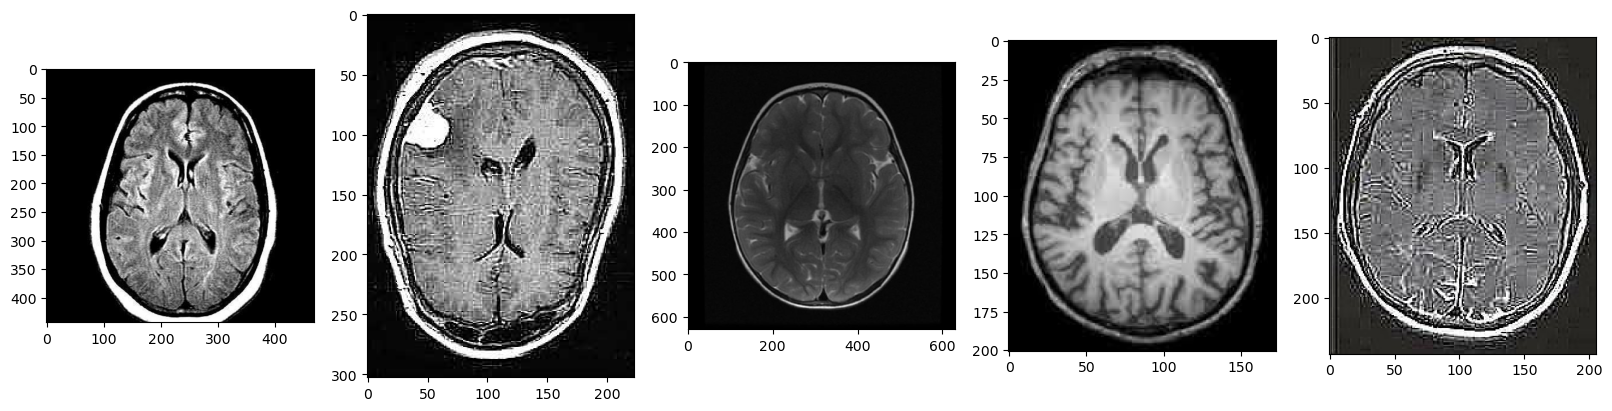

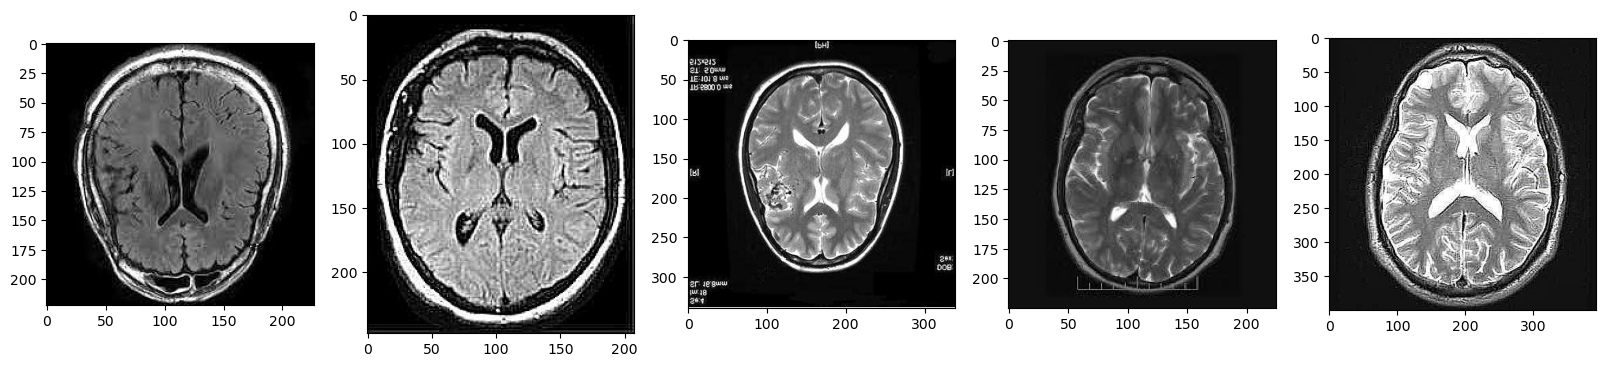

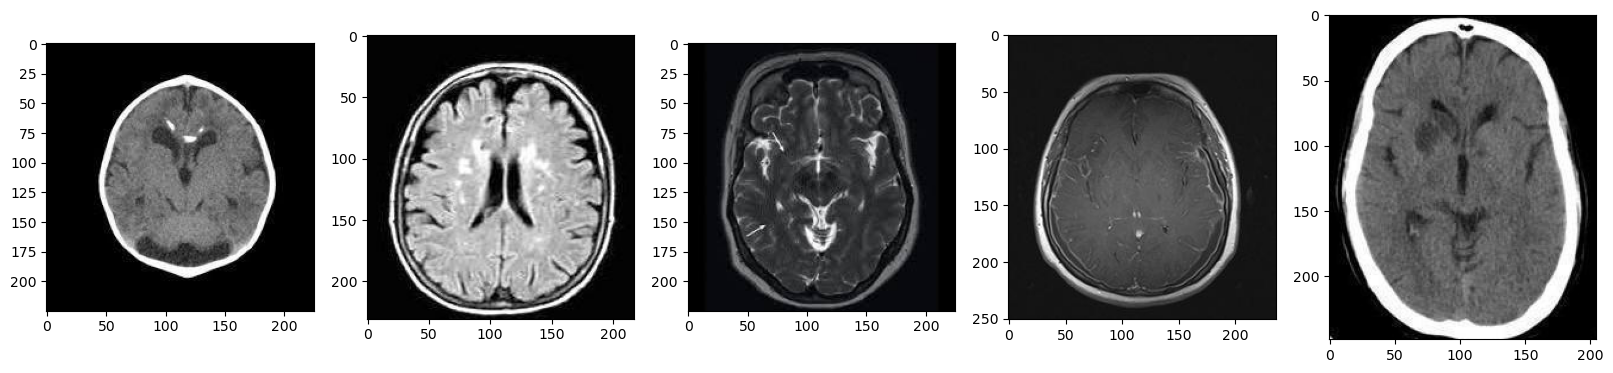

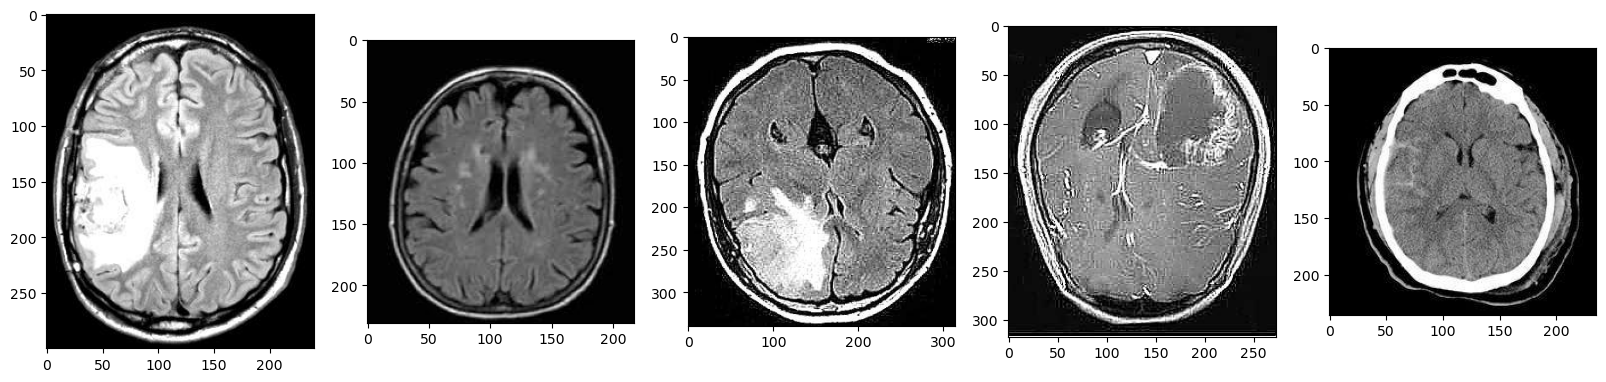

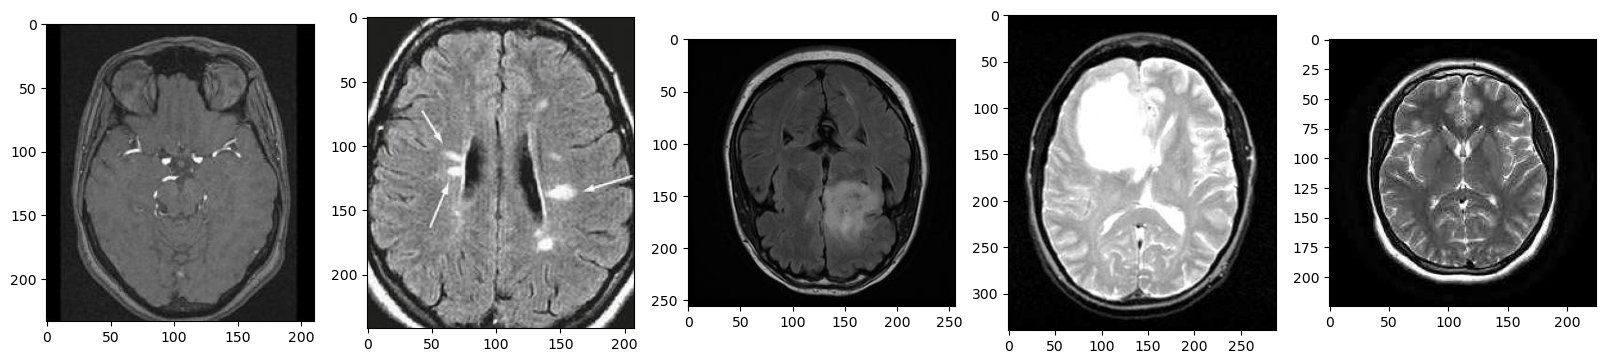

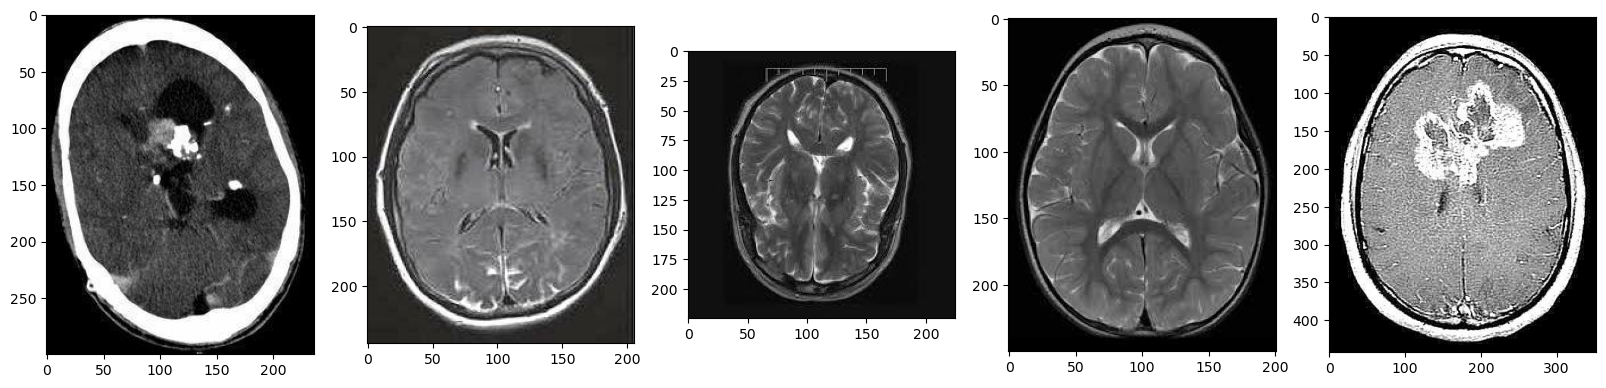

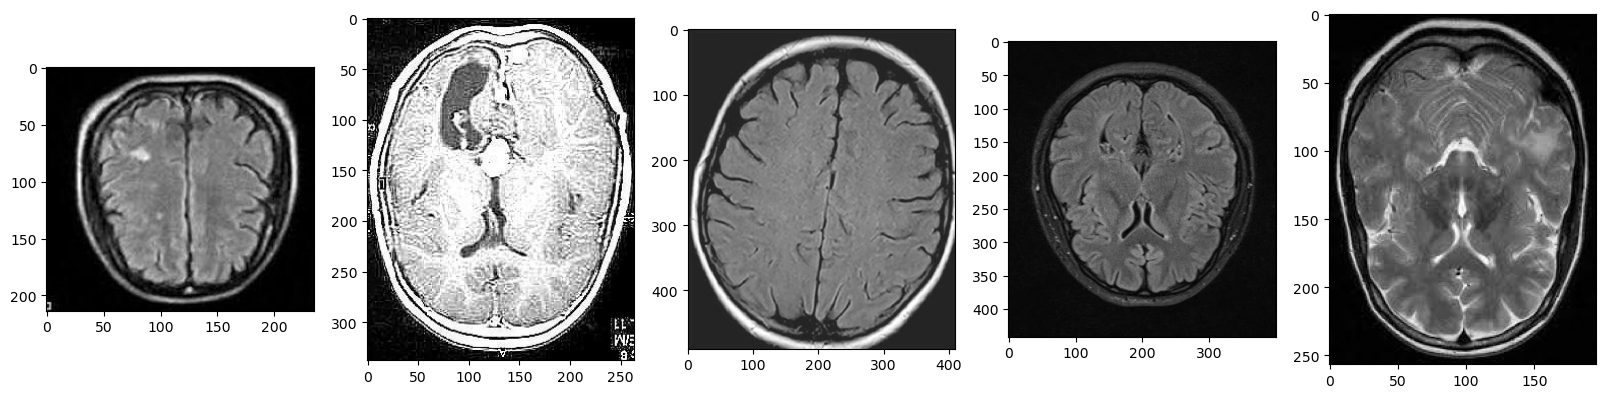

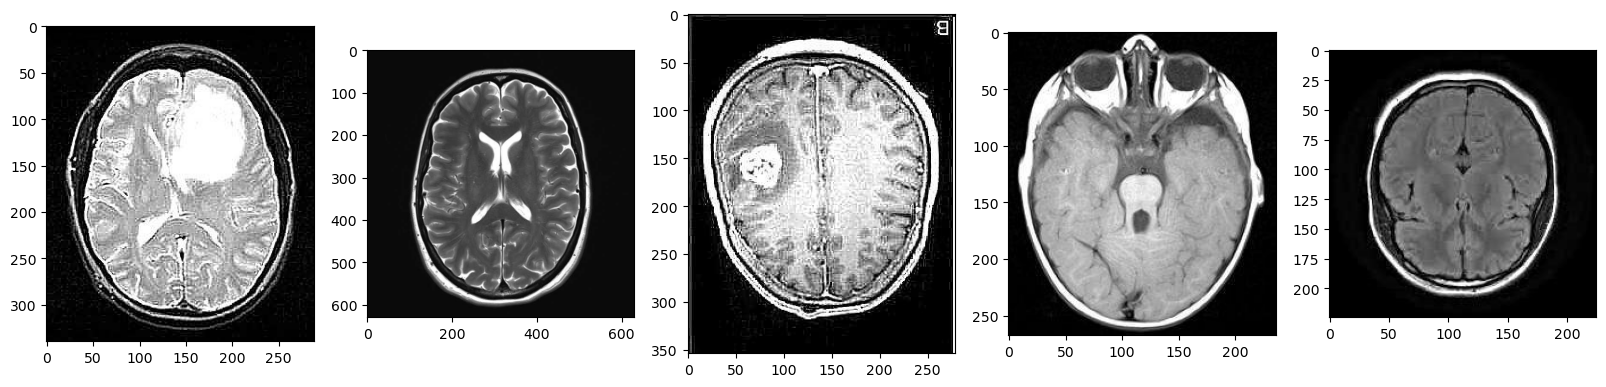

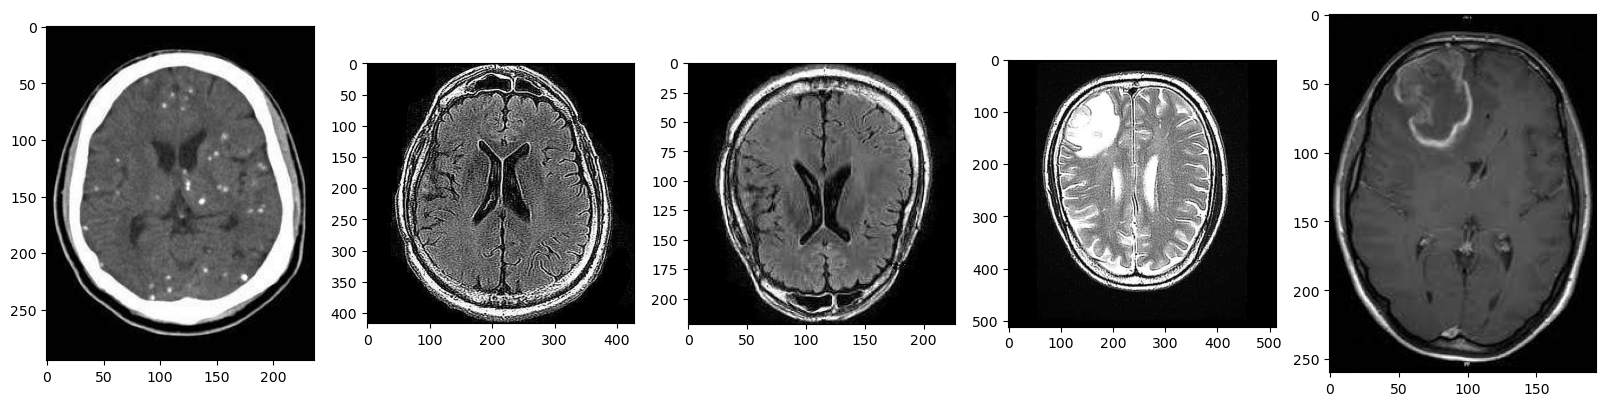

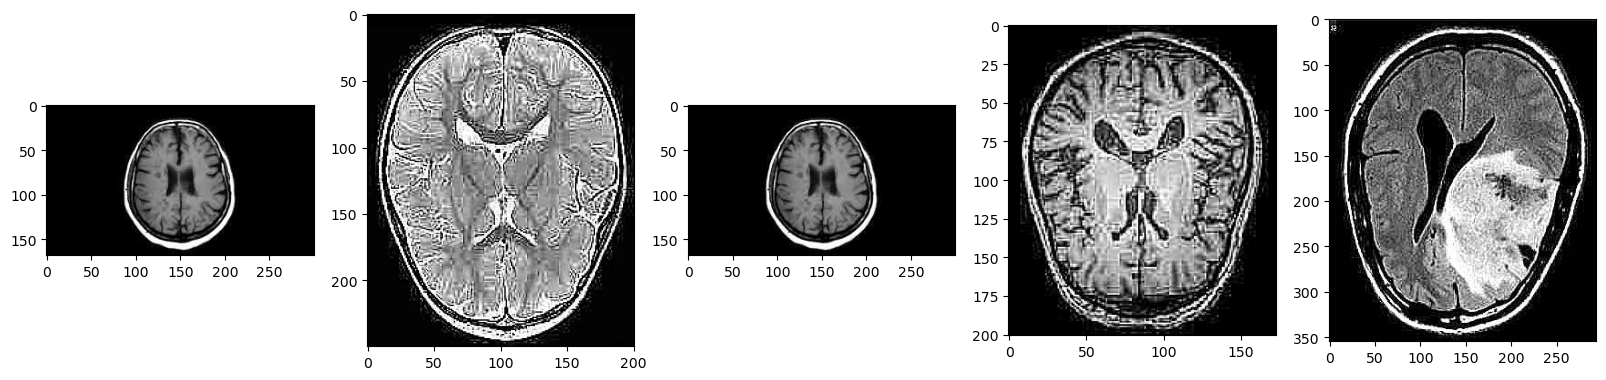

[array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 0]


/var/folders/ds/lmqdk3z54dx1dp791g16xnb40000gn/T/ipykernel_20916/598418026.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [3]:
d = "brain_archive"
f = "all_set"
train = get_data(d, f)

## Visualize data 

<AxesSubplot:xlabel='Class', ylabel='count'>

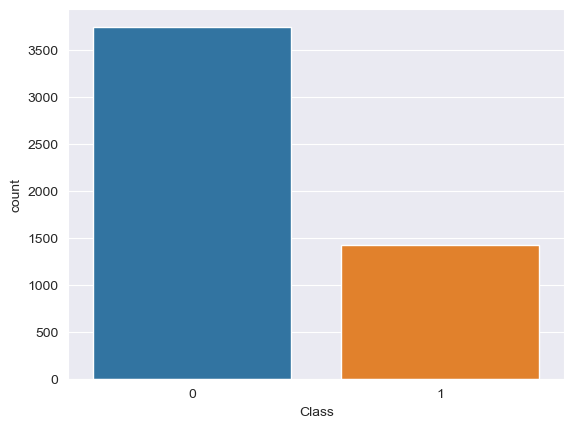

In [4]:
c = pd.DataFrame(train[:, 1])
c.columns = ['Class']
sns.set_style('darkgrid')
sns.countplot(x="Class", data=c)

The DataSet consist of 2 classes. \
The data set by codes from 0 and 1. 


In [5]:
class_names = {0: 'No tumor was found', 1: 'The tumor was found'}

In [6]:
print(train.shape)

(5164, 2)


In [7]:
# sklearn function
from sklearn.model_selection import train_test_split
im_train, im_test, c_train, c_test = train_test_split(train[:, 0], train[:, 1], test_size=0.3, shuffle=True)
c_train = c_train.astype('int')
c_test = c_test.astype('int')

In [8]:
print("Train shape", im_train.shape) # Size of the training DataSet
print("Test shape", im_test.shape) # Size of the test DataSet

Train shape (3614,)
Test shape (1550,)


The training DataSet consists of 3614 images and the test one consists of 1550 images. \
All the images are in RGB format, sizes of images are different.


<AxesSubplot:xlabel='Train Class Name', ylabel='count'>

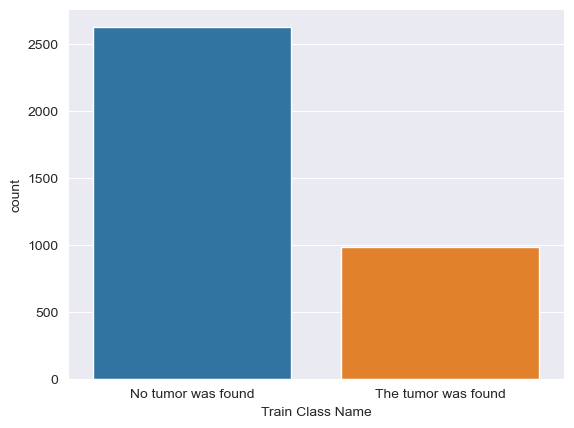

In [9]:
c = pd.DataFrame(c_train)
c.columns = ['Train Class']
c['Train Class Name'] = c['Train Class'].map(class_names)
sns.set_style('darkgrid')
sns.countplot(x="Train Class Name", data=c, order = ['No tumor was found', 'The tumor was found'])

<AxesSubplot:xlabel='Test Class Name', ylabel='count'>

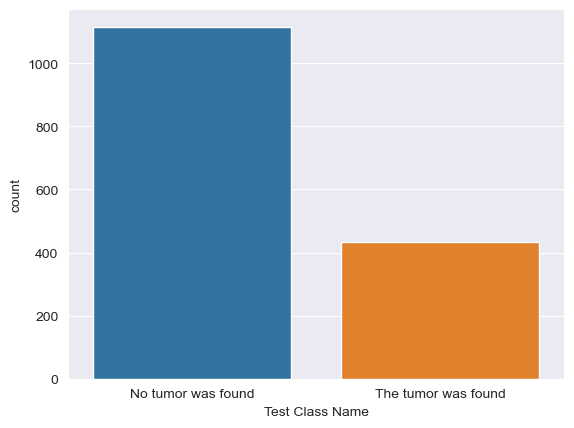

In [11]:
c = pd.DataFrame(c_test)
c.columns = ['Train Class']
c['Test Class Name'] = c['Train Class'].map(class_names)
sns.set_style('darkgrid')
sns.countplot(x="Test Class Name", data=c, order = ['No tumor was found', 'The tumor was found'])

The training and test DataSets consist of a similar distribution of image classes.


## Data visualization


Visualize the first 5 images in the training DataSet:


Brain Tumor MRI
_______________
No tumor was found


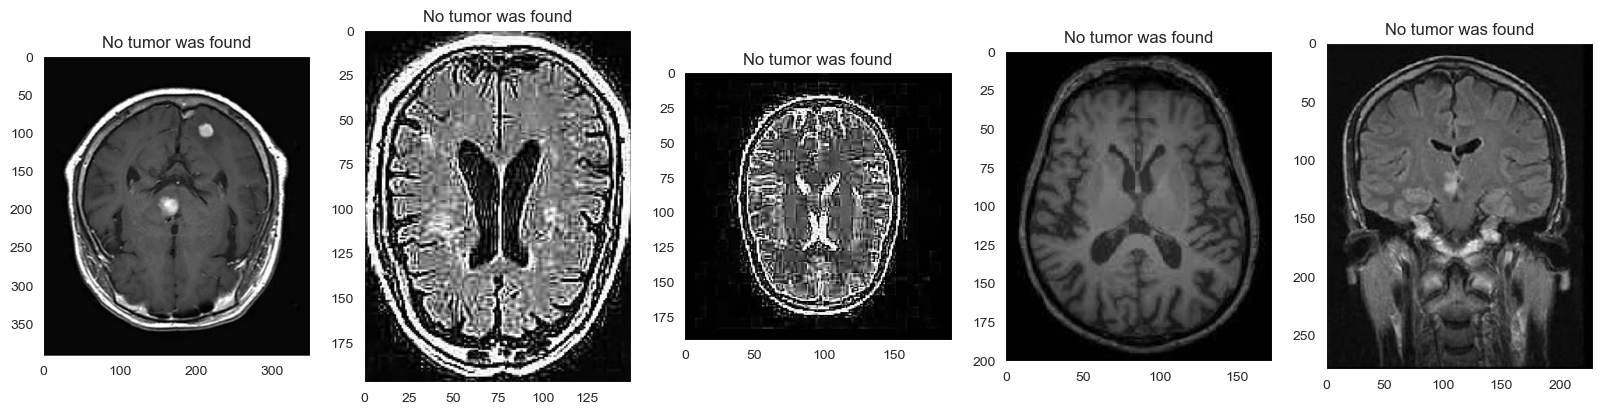

The tumor was found


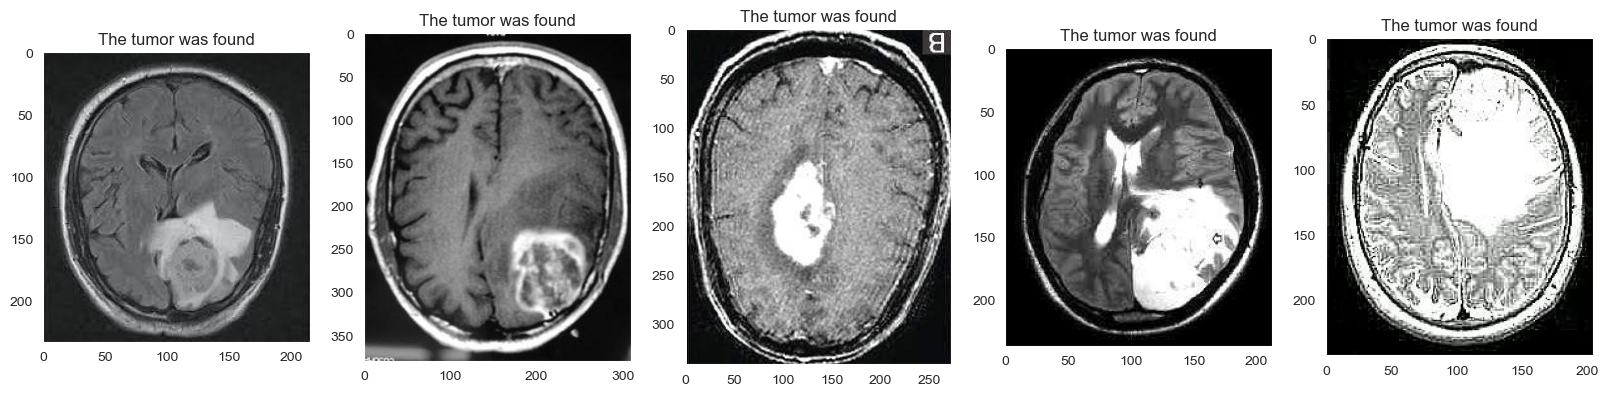

In [12]:
print("Brain Tumor MRI")
print("_______________")

plt.rcParams["axes.grid"] = False
for c in class_names:
    ims = np.where(c_train == c)[0][:5]
    print(class_names[c])
    fig = plt.figure(figsize = (20,20)) 
    for i, im in enumerate(ims):
        plt.subplot(1, 5, i+1) #create a table of images
        plt.imshow(im_train[im])
        plt.title(class_names[c])
    plt.show()  
   

## Image features creation


To categorize objects, we transform the DataSet so that the input is a set of features, and the output is an object class. \
An image is a matrix of pixels; each pixel is a color. \
Submitting a raw picture into a classical classifier's input is impossible. \
So, we turn each image into a set of specific features.


In [13]:
def create_features(im):
    features = []
    for image in im:
        im_grey = mh.colors.rgb2gray(image, dtype = np.uint8)
        features.append(mh.features.haralick(im_grey).ravel())
    features = np.array(features)
    return (features) 

In [14]:
features_train = create_features(im_train)
features_test = create_features(im_test)

In [15]:
print(features_train.shape)
print(features_test.shape)

(3614, 52)
(1550, 52)


In [23]:
print(features_test)

[[ 5.48665377e-03  9.95505717e+02  9.36752385e-01 ...  5.72149922e+00
  -2.38145279e-01  9.81684142e-01]
 [ 8.50116006e-02  4.38053238e+03  5.82260784e-01 ...  5.32453012e+00
  -2.51488149e-01  9.65473188e-01]
 [ 3.14680938e-01  1.95852100e+02  9.64646369e-01 ...  3.12547582e+00
  -3.71839117e-01  9.67152848e-01]
 ...
 [ 1.85137047e-02  1.13194347e+02  9.80412481e-01 ...  4.11361521e+00
  -3.62753304e-01  9.94439074e-01]
 [ 5.29815965e-03  1.12866505e+02  9.78028539e-01 ...  4.32025100e+00
  -3.40114902e-01  9.94427107e-01]
 [ 3.87478804e-02  3.42640820e+02  9.71103731e-01 ...  4.70959858e+00
  -3.20046255e-01  9.91723981e-01]]


# Comparing different classification methods


We used a Pipeline to compare classifiers.

Classifiers used:
* [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0UEREN465-2022-01-01&highlight=logistic+regression#sklearn.linear_model.LogisticRegression)
* [Nearest Neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0UEREN465-2022-01-01&highlight=nearest+neighbors#sklearn.neighbors.NearestNeighbors)
* [Linear SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0UEREN465-2022-01-01&highlight=linear+svm#sklearn.svm.LinearSVR)
* [RBF SVM](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.kernels.RBF.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0UEREN465-2022-01-01&highlight=rbf#sklearn.gaussian_process.kernels.RBF)
* [Gaussian Process](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessClassifier.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0UEREN465-2022-01-01&highlight=gaussianprocessclassifier#sklearn.gaussian_process.GaussianProcessClassifier)
* [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0UEREN465-2022-01-01&highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier)
* [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0UEREN465-2022-01-01&highlight=randomforestclassifier#sklearn.ensemble.RandomForestClassifier)
* [Multi-layer Perceptron classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0UEREN465-2022-01-01&highlight=mlpclassifier#sklearn.neural_network.MLPClassifier)
* [Ada Boost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0UEREN465-2022-01-01&highlight=adaboostclassifier#sklearn.ensemble.AdaBoostClassifier)
* [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0UEREN465-2022-01-01&highlight=gaussiannb#sklearn.naive_bayes.GaussianNB)
* [Quadratic Discriminant Analysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0UEREN465-2022-01-01&highlight=quadraticdiscriminantanalysis#sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis)


In [21]:
names = ["Logistic Regression", "Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    LogisticRegression(max_iter=1000),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]
scores_train = []
scores_test = []
matrix_list = []
for name, clf in zip(names, classifiers):
    print("Fitting:", name)
    clf = Pipeline([('preproc', StandardScaler()), ('classifier', clf)])
    clf.fit(features_train, c_train)
    score_train = clf.score(features_train, c_train)
    score_test = clf.score(features_test, c_test)
    scores_train.append(score_train)
    scores_test.append(score_test)
    matrix_list.append([clf, features_test, c_test])

Fitting: Logistic Regression
Fitting: Nearest Neighbors


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Fitting: Linear SVM
Fitting: RBF SVM
Fitting: Gaussian Process
Fitting: Decision Tree
Fitting: Random Forest
Fitting: Neural Net
Fitting: AdaBoost
Fitting: Naive Bayes
Fitting: QDA


/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Results as a table.


In [17]:
res = pd.DataFrame(index = names)
res['scores_train'] = scores_train
res['scores_test'] = scores_test
res.columns = ['Train','Test']
res.index.name = "Classifier accuracy"
pd.options.display.float_format = '{:,.2f}'.format
print(res)

                     Train  Test
Classifier accuracy             
Logistic Regression   0.84  0.83
Nearest Neighbors     0.99  0.96
Linear SVM            0.83  0.82
RBF SVM               1.00  0.98
Gaussian Process      1.00  0.99
Decision Tree         0.87  0.84
Random Forest         0.87  0.83
Neural Net            0.85  0.84
AdaBoost              0.87  0.84
Naive Bayes           0.71  0.68
QDA                   0.84  0.82


Gaussian Process, RBF SVM  and Nearest Neighbors  show the best result for the test DataSet.

Results on a plot:


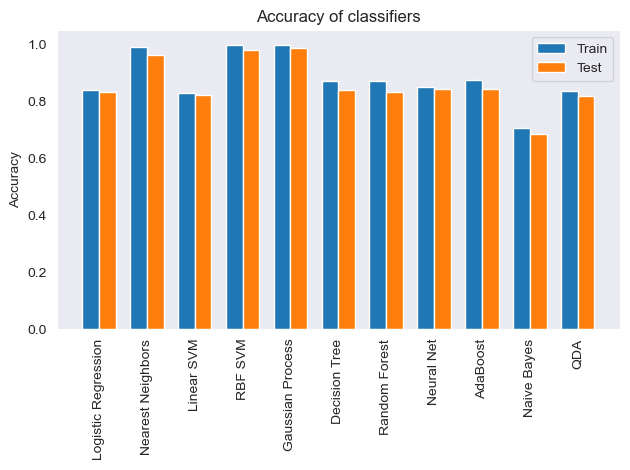

In [18]:
x = np.arange(len(names))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, scores_train, width, label='Train')
rects2 = ax.bar(x + width/2, scores_test, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of classifiers')
ax.set_xticks(x)
plt.xticks(rotation = 90)
ax.set_xticklabels(names)
ax.legend()

fig.tight_layout()

plt.show()

For the analysis we used conflusion matrix to check how many mistaken predictions we got.

Function **[plot_confusion_matrix()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0UEREN465-2022-01-01)**

Logistic Regression    Training DataSet accuracy:  83.9% Test DataSet accuracy:  83.2%


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


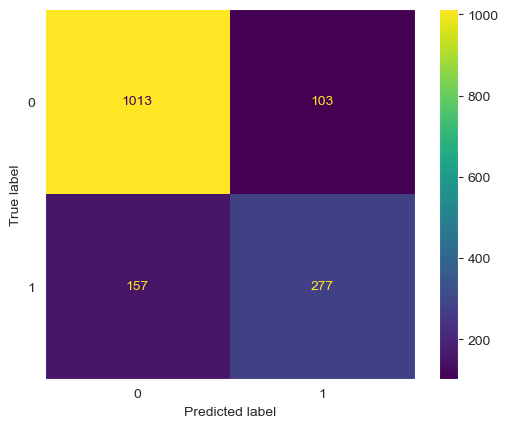

Nearest Neighbors    Training DataSet accuracy:  99.0% Test DataSet accuracy:  96.3%


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


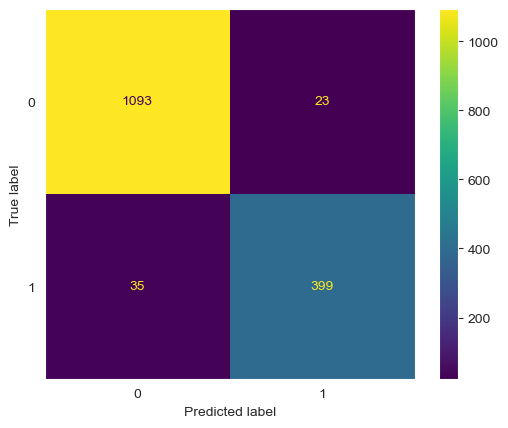

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Linear SVM    Training DataSet accuracy:  83.1% Test DataSet accuracy:  82.4%


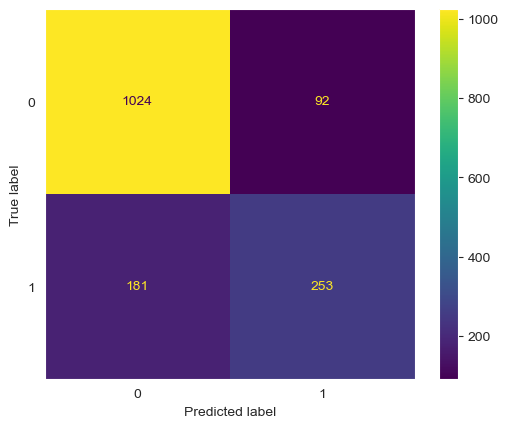

RBF SVM    Training DataSet accuracy:  100.0% Test DataSet accuracy:  98.2%


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


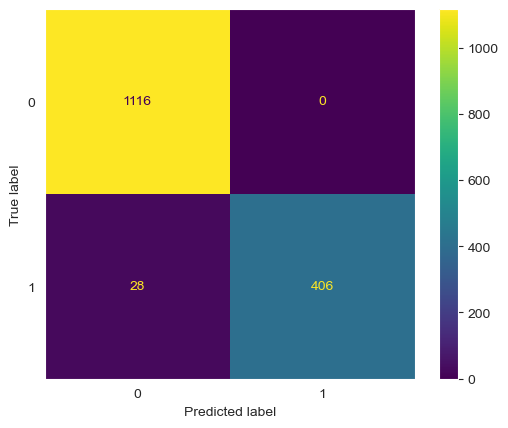

Gaussian Process    Training DataSet accuracy:  100.0% Test DataSet accuracy:  98.8%


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


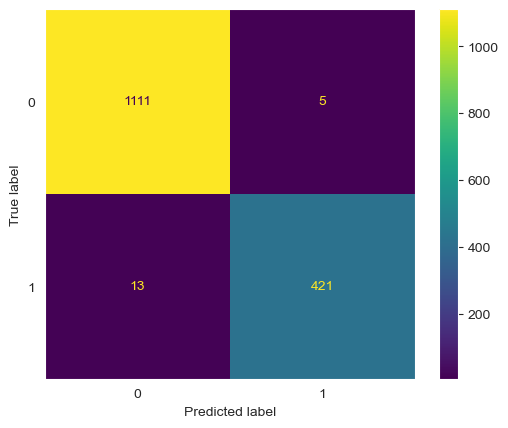

Decision Tree    Training DataSet accuracy:  87.3% Test DataSet accuracy:  84.2%


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


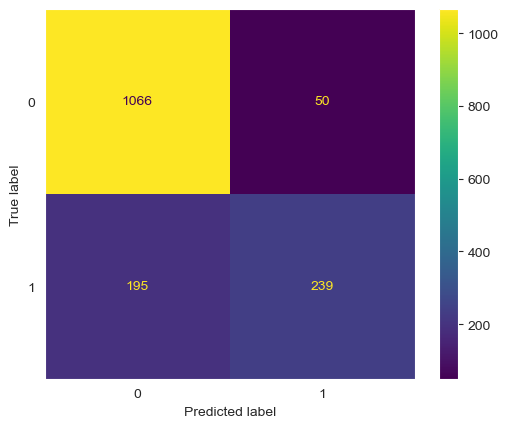

Random Forest    Training DataSet accuracy:  84.5% Test DataSet accuracy:  83.5%


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


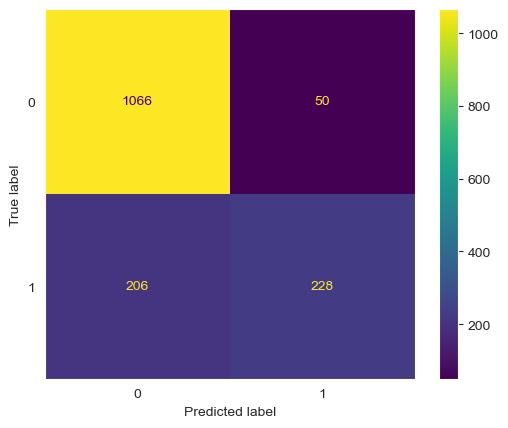

Neural Net    Training DataSet accuracy:  84.8% Test DataSet accuracy:  83.5%


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


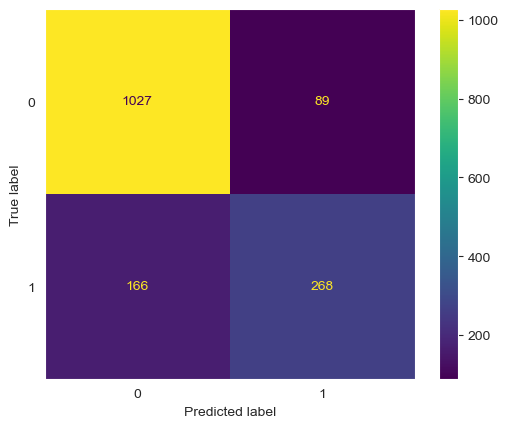

AdaBoost    Training DataSet accuracy:  87.4% Test DataSet accuracy:  84.5%


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


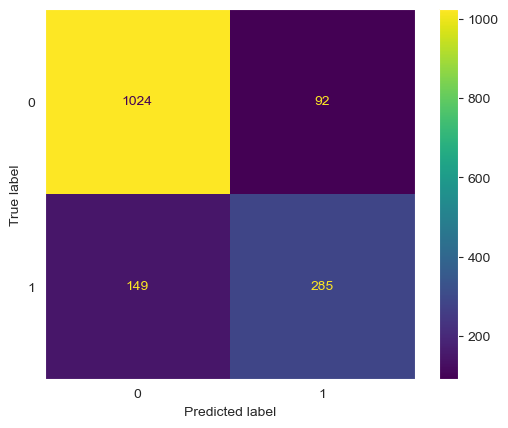

Naive Bayes    Training DataSet accuracy:  70.6% Test DataSet accuracy:  68.5%


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


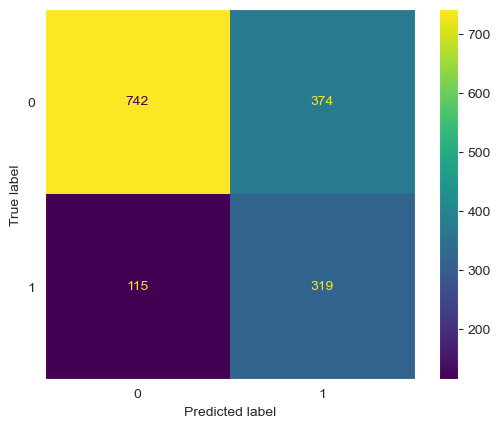

QDA    Training DataSet accuracy:  83.6% Test DataSet accuracy:  82.0%


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


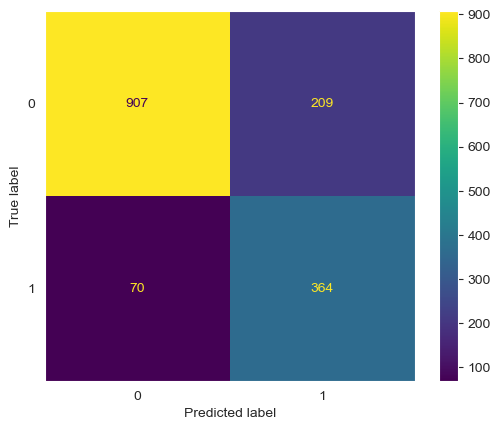

In [22]:
i = 0
for i in range(len(scores_train)): 
    print(names[i], '   Training DataSet accuracy: {: .1%}'.format(scores_train[i]), 'Test DataSet accuracy: {: .1%}'.format(scores_test[i]))
    plot_confusion_matrix(matrix_list[i][0], matrix_list[i][1], matrix_list[i][2])  
    plt.show()